# Predicting Credit Risk
**Supervised Machine Learning**

## Objective 
* To build a machine learning model that attempts to predict whether a loan from LendingClub will become high risk or not.

## Background
LendingClub is a peer-to-peer lending services company that allows individual investors to partially fund personal loans as well as buy and sell notes backing the loans on a secondary market. LendingClub offers their previous data through an API.
Task was to use this data to create machine learning models to classify the risk level of given loans. Specifically, would be comparing the Logistic Regression model and Random Forest Classifier.
___________________________________________________________________________________________________
## Dowloaded the latest version of datasets from [https://resources.lendingclub.com](https://resources.lendingclub.com)
#### Retrieved and prepared the data using [GenerateData.ipynb](Resources/Generator/GenerateData.ipynb)

GenerateData.ipynb does the following

* Reads the csv files that has been dowloaded from LendingClub.  

* Cleans the data and creates two CSVs that have been undersampled to give an evennumber of high risk and low risk loans.
   
    * 2019loans.csv  
    * 2020Q1loans.csv

In the original dataset, only 2.2% of loans are categorized as high risk. To get a truly accurate model, special techniques need to be used on imbalanced data. Undersampling is one of those techniques.

```python
low_risk_rows.sample(n=len(high_risk_rows), random_state=42)
```
    
Note : The newer version of csv's are slightly different compared to older version that was already available in the folder.

## In this Notebook ('Credit Risk Evaluator.ipynb')
* We are using an entire year's worth of data (2019) to predict the credit risk of loans from the first quarter of the next year (2020).

## Logistic regression Vs. Random Forests Classifier

Both the models are popular in machine learning. They are both efficient in generating reliable models for predictive modelling.

* Logistic regression is less complex, and less prone to over-fitting. 
* It does not require any parameters to tune.
* It performs best with scaled data.  
<br />

* Random Forest uses Decision trees that can be scaled to be complex, and hence more liable to over-fit. Pruning is applied to avoid this.
* Although default parameters may work fine, Random Forests work best when they are tuned by applying parametes.
* Random Forsests perfoms well with unscaled data. 

When creating a predictive model, both the techniques should be tried and the best performing model should be used.

## A prediction as to which model will perform better before I created, fit, and scored the models. 
I predict Logistic regression will perform better because it works best for binany classification problems. The data in question has binary out put belonging to one class or the other (High Risk, Low Risk)

**LET's FIND OUT**

Steps :
1. Converted categorical data to numeric and separated target feature for training data and testing data
2. Encoded target values using class sklearn.preprocessing.LabelEncoder
3. Added missing dummy variables to testing set
4. Trained the Logistic Regression model on the unscaled data and printed the model score
    * Adjusted hyperparameters on LR model on unscaled data to see if the score improves .
        * Tried a few combinations to tune
        * It did improve the Testing Data Score by 5%
        * Takes longer execution time each time a parameter/parameters is/are changed
6. Trained a Random Forest Classifier model on unscaled data and printed the model score  
    * Adjusted hyperparameters to see if the score improves .  
    To choose which hyperparameters to adjust, we could visualize with validation_curve, or conduct Exhaustive Grid Search. 
     * Used validation_curve and test the parameters 'n_estimators', 'max_depth', 'min_samples_split' by giving them a range of values.       
     * Adjusted the Hyperparameters on RF Classifiers on unscaled data 
        * Tried a few combinations to tune
        * It did NOT improve the Testing Data Score 
        * Takes longer execution time each time a parameter/parameters is/are changed
## Results
Unlike my prediction, The Random Forest Classifier performed far better then the logistic regression model on unscaled data.   
2020 First Quarter score was : **0.4913317572892041** for Logistic regression model.  
Random forest 2020 First Quarter score was : **0.67625426845285**
## Revisit the Preprocessing: Scale the data
 * I predict that scaling data will considerably improve logistic regression model and it will outperform Random Forest Model. 
 StandardScaler makes field values compareable by removing the mean and by scaling each feature/variable to unit variance.
 * We know that Random Forst Model is built on decision trees and ensemble methods that do not require feature scaling as they are not sensitive to the the variance in the data. Hence, we might not see significant improvement in Random Forest model.
## Scaled Training and Testging sets using StandardScaler().fit_transform()
## Trained the Logistic Regression model on the scaled data and printed the model score
* Logistic regression model improved considerably after scaling the data.
## Trained Random Forest Classifier model on the scaled data and printed the model score
* Random Forest has no positive effect with scaled data. It did Not improve.
* Logistice Regression outperformed random Forest Classifier.
# Conclusions
* After scaling the data, Logistic Regression outperformed Random Forest Classifier.
## LogisticRegression Model Performed well on this Data and we can conclude that it is the right Model.

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# To choose which hyperparameters to adjust, we could visualize with validation_curve
from yellowbrick.model_selection import validation_curve

# or conduct Exhaustive Grid Search.
# from sklearn.model_selection import GridSearchCV #  


In [33]:
# !pip install yellowbrick

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [3]:
# Convert categorical data to numeric and separate target feature for training data
# separate target feature for training data
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

# Convert categorical data to numeric
X_train = pd.get_dummies(X_train)

# encoding target values using class sklearn.preprocessing.LabelEncoder
y_train = LabelEncoder().fit_transform(y_train)

In [4]:
# print(X_train)
# print(y_train)

In [5]:
# Convert categorical data to numeric and separate target feature for testing data

# separate target feature for testing data
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# Convert categorical data to numeric
X_test = pd.get_dummies(X_test)

# encoding target values using class sklearn.preprocessing.LabelEncoder
y_test = LabelEncoder().fit_transform(y_test)

In [6]:
# print(X_test)
# print(y_test)

In [7]:
# add missing dummy variables to testing set
# Compare fields from train to test. If there is field in traning dataset that is not in testing set , add it to X_test
for colmn in X_train.columns:
    if colmn not in X_test.columns:
        X_test[colmn] = 0
     

### I predict Logistic regression will perform better because it works best for binany classification problems. The data in question has binary out put belonging to one class or the other (Low Risk or High Risk (1,0))  
### Let's Find Out

## Train the Logistic Regression model on the unscaled data and print the model score

In [8]:
# Train the Logistic Regression model on the unscaled data
model_unscaled = LogisticRegression(max_iter=10000)
model_unscaled.fit(X_train, y_train)

LR_US_Tr_scr = model_unscaled.score(X_train, y_train)
LR_US_Tst_scr = model_unscaled.score(X_test, y_test)
# Print the model score
print(f"Training data scrore : {LR_US_Tr_scr}")
print(f"Testing data scrore : {LR_US_Tst_scr}")



Training data scrore : 0.7245338264755741
Testing data scrore : 0.44102968216443394


Adjusting hyperparameters to see if the score improves .

In [9]:

#model_unscaled = LogisticRegression(solver="saga", max_iter=10000, C=3.2, penalty='l2')
model_unscaled = LogisticRegression(solver="sag", max_iter=10000, C=2.5, penalty='l2')
model_unscaled.fit(X_train, y_train)

LR_US_Tr_Par_scr = model_unscaled.score(X_train, y_train)
LR_US_Tst_Par_scr = model_unscaled.score(X_test, y_test)

# Print the model score
print(f"Training data scrore : {LR_US_Tr_Par_scr}")
print(f"Testing data scrore : {LR_US_Tst_Par_scr}")

Training data scrore : 0.6311450146401603
Testing data scrore : 0.4913317572892041


In [10]:
print(LR_US_Tst_Par_scr - LR_US_Tst_scr)

0.05030207512477014


#### Adjusting the Hyperparameters on LR model on unscaled data 
* Tried a few combinations to tune
* It did improve the Testing Data Score by 5%
* Takes longer execution time each time a parameter/parameters is/are changed


## Train a Random Forest Classifier model on unscaled data and print the model score


In [11]:
# Train the Random Forest Classifier model on unscaled data
model_unscaledRF = RandomForestClassifier()
model_unscaledRF.fit(X_train, y_train)

# Print the model score
RF_US_Tr_scr  = model_unscaledRF.score(X_train, y_train)
RF_US_Tst_scr = model_unscaledRF.score(X_test, y_test)


print(f"Training data scrore : {RF_US_Tr_scr}")
print(f"Testing data scrore : {RF_US_Tst_scr}")

Training data scrore : 1.0
Testing data scrore : 0.669424743892829


Adjusting hyperparameters to see if the score improves .  
To choose which hyperparameters to adjust, we could visualize with validation_curve, or conduct Exhaustive Grid Search. Here we are using validation_curve and test the parameters 'n_estimators', 'max_depth', 'min_samples_split'by giving them a range of values. 

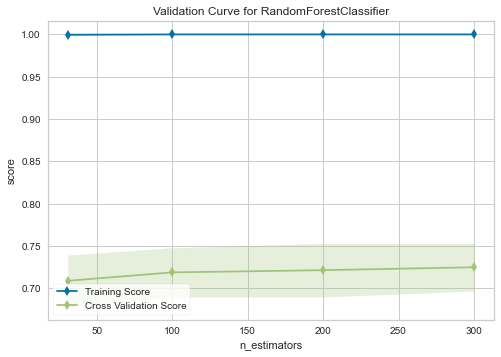

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='n_estimators',
                param_range=array([ 31, 100, 200, 300]), scoring='accuracy')


In [12]:
print(validation_curve(model_unscaledRF, X_train, y_train, param_name="n_estimators", n_jobs=-1,
      param_range = [31,100,200,300], cv=3, scoring="accuracy"))

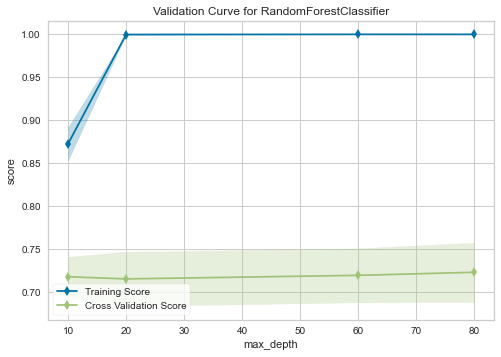

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='max_depth', param_range=array([10, 20, 60, 80]),
                scoring='accuracy')


In [13]:
print(validation_curve(model_unscaledRF, X_train, y_train, param_name="max_depth", n_jobs=-1,
      param_range = [10,20,60,80], cv=3, scoring="accuracy"))

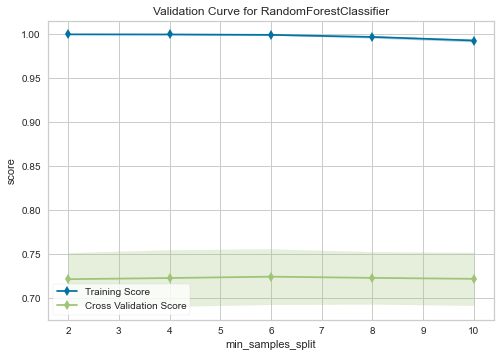

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='min_samples_split',
                param_range=array([ 2,  4,  6,  8, 10]), scoring='accuracy')


In [14]:
print(validation_curve(model_unscaledRF, X_train, y_train, param_name="min_samples_split", n_jobs=-1,
      param_range = [2,4,6,8,10], cv=3, scoring="accuracy"))

In [15]:
# Train the Random Forest Classifier model on unscaled data using best parameters from validation_curve.
model_unscaledRF = RandomForestClassifier(n_estimators=200, max_depth=60, min_samples_split=8)
model_unscaledRF.fit(X_train, y_train)



# Print the model score
RF_US_Tr_Par_scr  = model_unscaledRF.score(X_train, y_train)
RF_US_Tst_Par_scr = model_unscaledRF.score(X_test, y_test)


print(f"Training data scrore : {RF_US_Tr_Par_scr}")
print(f"Testing data scrore : {RF_US_Tst_Par_scr}")

Training data scrore : 0.9980736631222068
Testing data scrore : 0.6702127659574468


In [16]:

model_unscaledRF = RandomForestClassifier(n_estimators=31)
# model_unscaledRF = RandomForestClassifier(max_features=0.4, n_estimators = 31, min_samples_leaf=64)
#model_unscaledRF = RandomForestClassifier(n_estimators = 31, oob_score = True,n_jobs = -1,random_state =1)
model_unscaledRF.fit(X_train, y_train)

# Print the model score
RF_US_Tr_Par_scr  = model_unscaledRF.score(X_train, y_train)
RF_US_Tst_Par_scr = model_unscaledRF.score(X_test, y_test)


print(f"Training data scrore : {RF_US_Tr_Par_scr}")
print(f"Testing data scrore : {RF_US_Tst_Par_scr}")

Training data scrore : 0.9997688395746648
Testing data scrore : 0.6765169424743893


**Tried a few parameters but the best score was for n_estimators=31**

In [17]:
print(RF_US_Tst_Par_scr - RF_US_Tst_scr)

0.007092198581560294


#### Adjusting the Hyperparameters on RF Classifiers  on unscaled data 
* Tried a few combinations to tune
* It did NOT improve the Testing Data Score 
* Takes longer execution time each time a parameter/parameters is/are changed

## Results
Unlike my prediction, The Random Forest Classifier performed far better then the logistic regression model.   
2020 First Quarter score was : **0.4913317572892041** for Logistic regression model.  
Random forest 2020 First Quarter score was : **0.67625426845285**

In [26]:
if (LR_US_Tst_Par_scr >= LR_US_Tst_scr):
    LR_US_Tst_scr = LR_US_Tst_Par_scr
if (RF_US_Tst_Par_scr >= RF_US_Tst_scr):
    RF_US_Tst_scr = RF_US_Tst_Par_scr    
if (LR_US_Tr_Par_scr >= LR_US_Tr_scr):
    LR_US_Tr_scr = LR_US_Tr_Par_scr
if (RF_US_Tr_Par_scr >= RF_US_Tr_scr):
    RF_US_Tr_scr = RF_US_Tr_Par_scr        

pd.DataFrame(data=[[LR_US_Tst_scr,RF_US_Tst_scr]], 
columns=['Logistic Reg UnScaled', 'Random Forest UnScaled'])

,Logistic Reg UnScaled,Random Forest UnScaled
0,0.491332,0.676517


# Revisit the Preprocessing: Scale the data
 * I predict that scaling data will considerably improve logistic regression model and it will outperform Random Forest Model. 
 StandardScaler makes field values compareable by removing the mean and by scaling each feature/variable to unit variance.
 * We know that Random Forst Model is built on decision trees and ensemble methods that do not require feature scaling as they are not sensitive to the the variance in the data. Hence, we might not see significant improvement in Random Forest model.


In [20]:
# Data before scaling
#X_train

In [21]:
X_train_scaled = StandardScaler().fit_transform(X_train)
# display(X_train_scaled)

X_test_scaled = StandardScaler().fit_transform(X_test)
# display(X_test_scaled)

In [22]:
# Data after scaling
#X_train_scaled

## Train the Logistic Regression model on the scaled data and print the model score


In [23]:
model_scaledLR = LogisticRegression(solver="sag", max_iter=10000, C=2.5, penalty='l2')
model_scaledLR.fit(X_train_scaled, y_train)

# Print the model score
LR_S_Tr_scr  = model_scaledLR.score(X_train_scaled, y_train)
LR_S_Tst_scr = model_scaledLR.score(X_test_scaled, y_test)


print(f"Training data scrore : {LR_S_Tr_scr}")
print(f"Testing data scrore : {LR_S_Tst_scr}")

# model_scaledLR.score(X_test_scaled, y_test)

Training data scrore : 0.7320850670365233
Testing data scrore : 0.7542684528500131


 * Logistic regression model improved considerably after scaling the data.

## Train a Random Forest Classifier model on the scaled data and print the model score

In [30]:
model_scaledRF = RandomForestClassifier(n_estimators=31)
model_scaledRF.fit(X_train_scaled, y_train)
# model_scaledRF.score(X_test_scaled, y_test)


# Print the model score
RF_S_Tr_scr  = model_scaledRF.score(X_train_scaled, y_train)
RF_S_Tst_scr = model_scaledRF.score(X_test_scaled, y_test)


print(f"Training data scrore : {RF_S_Tr_scr}")
print(f"Testing data scrore : {RF_S_Tst_scr}")

Training data scrore : 0.9997688395746648
Testing data scrore : 0.6111111111111112


* Random Forest has no positive effect with scaled data. It did Not improve.
* Logistice Regression outperformed random Forest Classifier.

In [31]:
final_results = pd.DataFrame(
    data={'Dataset':['2019loans(Training)', '2020Q1loans(Testing)'], \
    'Logistic Reg UnScaled':[LR_US_Tr_scr,LR_US_Tst_scr],\
    'Random Forest UnScaled':[RF_US_Tr_scr,RF_US_Tst_scr],\
    'Logistic Reg Scaled':[LR_S_Tr_scr,LR_S_Tst_scr],\
    'Random Forest Scaled':[RF_S_Tr_scr,RF_S_Tst_scr]\
    })
final_results    

,Dataset,Logistic Reg UnScaled,Random Forest UnScaled,Logistic Reg Scaled,Random Forest Scaled
0,2019loans(Training),0.724534,1.000000,0.732085,0.999769
1,2020Q1loans(Testing),0.491332,0.676517,0.754268,0.611111


# Conclusions
* After scaling the data, Logistic Regression outperformed Random Forest Classifier.
## LogisticRegression Model performed well on this Data